# More Matplotlib Functionality

In [110]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import yfinance as yf

### Figures and Axes
* mpl object are these two objects
* this means you can create and access each 
* in general you must have a figure and then you can add axes (subplots)

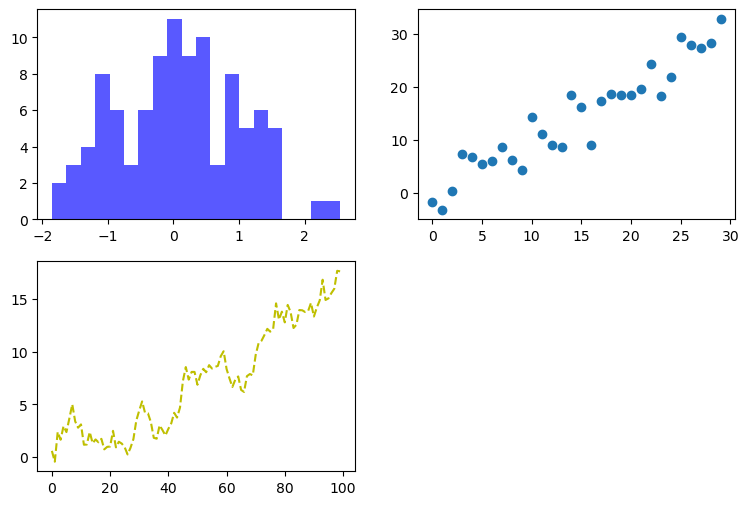

In [24]:
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
# If you call plot it puts the data in the last defined subplot, i.e. ax3 here
plt.plot(np.random.randn(100).cumsum(), 'y--')
ax1.hist(np.random.randn(100), bins=20, color='blue', alpha=0.65) # plot fill opacity
ax2.scatter(np.arange(30), np.arange(30)+ 3 * np.random.randn(30));
# plt.subplots_adjust(left=None,bottom=None, right=None, top=None)

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

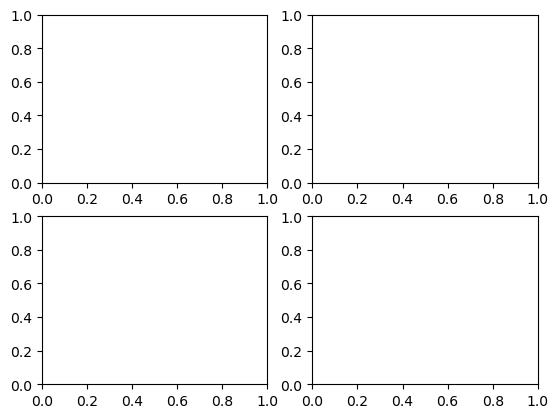

In [20]:
plt.subplots(2,2)

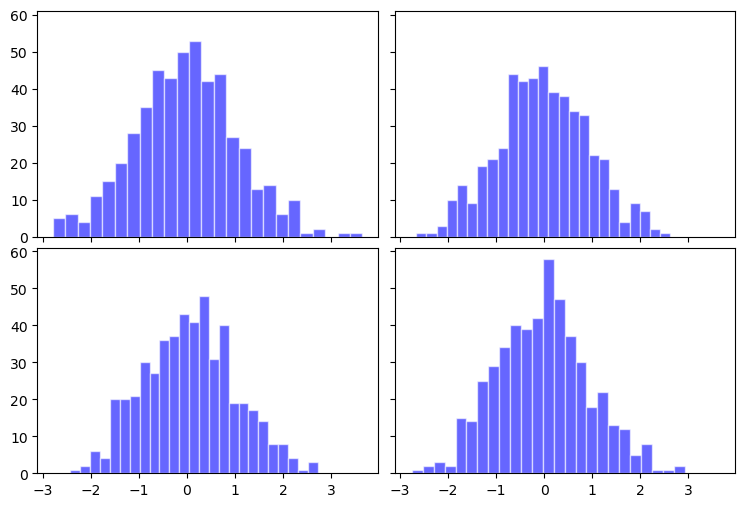

In [28]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True, figsize=(9,6))
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=25, color='b', edgecolor='w', alpha=0.6)
plt.subplots_adjust(wspace=.05, hspace=.05)  

# Line Graphs

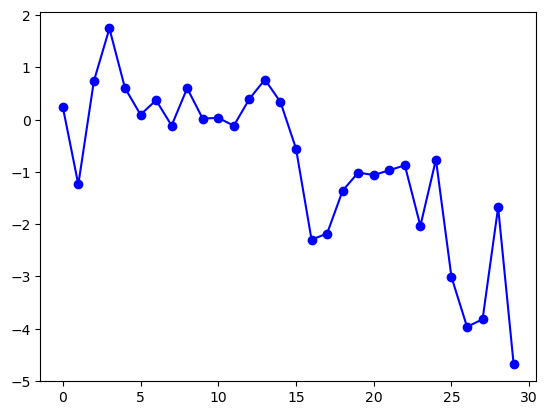

In [31]:
plt.plot(np.random.randn(30).cumsum(), 'bo-')

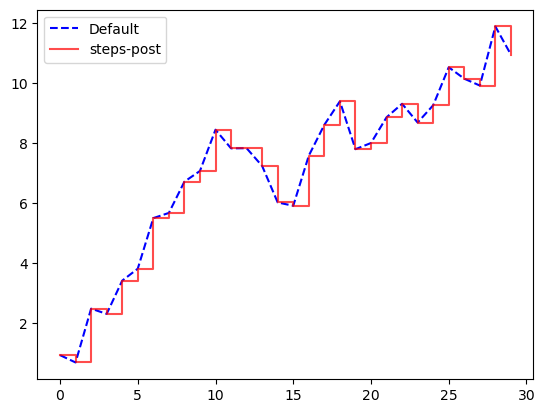

In [35]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'b--', label='Default')
plt.plot(data, 'r-', drawstyle='steps-post', label='steps-post', alpha=.7)
plt.legend(loc='best');

Text(0.5, 1.0, 'My Graph')

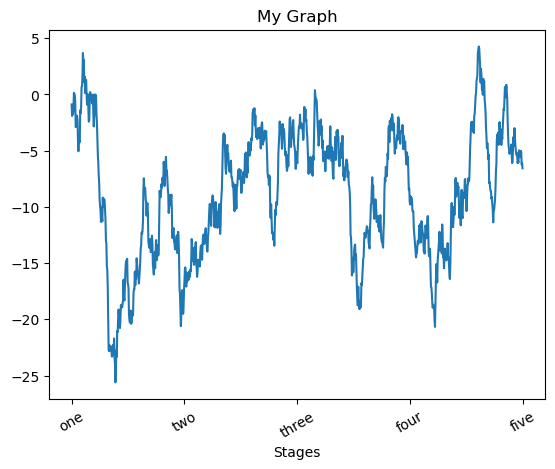

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                          rotation=30, fontsize=10)
ax.set_xlabel('Stages')
ax.set_title('My Graph')

In [43]:
data = yf.download("^GSPC", start='2007-01-01', end='2011-01-01')['Close']

[*********************100%%**********************]  1 of 1 completed


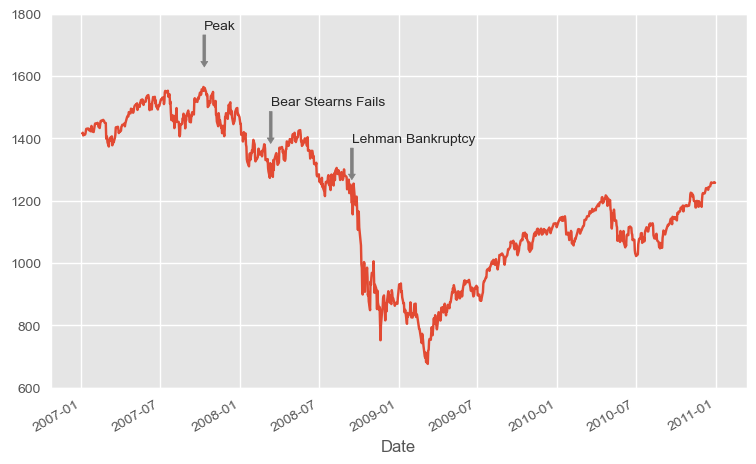

In [69]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data.plot(ax=ax)
crisis = [
    (datetime(2007,10,11), 'Peak'),
    (datetime(2008,3,12), 'Bear Stearns Fails'),
    (datetime(2008,9,15), 'Lehman Bankruptcy')
]

for date, label in crisis:
    ax.annotate(label, xy=(date, data.asof(date) + 75),
        xytext=(date, data.asof(date) + 225),
        arrowprops=dict(color='grey', headwidth=5, width=2, headlength=4),
        horizontalalignment='left', verticalalignment='top')
ax.set_ylim([600, 1800]);

# Themes
* https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [65]:
plt.style.use('ggplot')

# Scatter Plots
* Colormaps: https://matplotlib.org/stable/gallery/color/colormap_reference.html#sphx-glr-gallery-color-colormap-reference-py

In [101]:
data = yf.download(["AMZN" , "GOOG"], "2023-03-01")['Close']

[*********************100%%**********************]  2 of 2 completed


In [103]:
returns = np.log(data).diff()
returns.dropna(inplace=True)

(-0.11, 0.11)

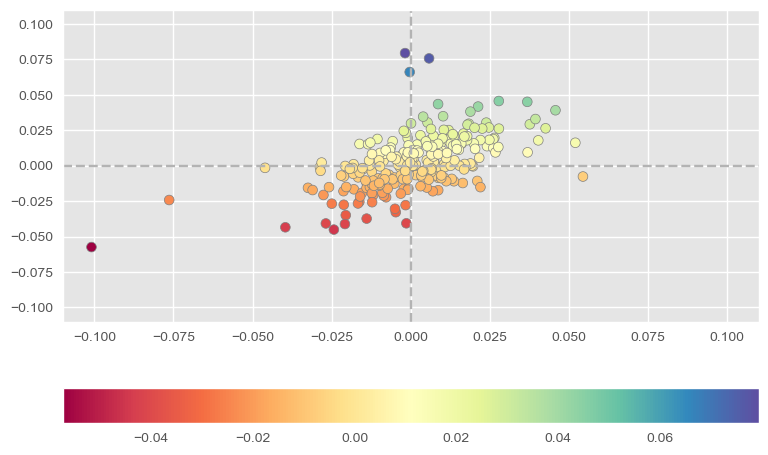

In [104]:
plt.scatter(returns.GOOG, returns.AMZN, c=returns.AMZN, 
            cmap='Spectral', edgecolor='grey')
plt.colorbar(orientation='horizontal')
plt.axhline(0, c=(.7,.7,.7), ls='--')
plt.axvline(0, c=(.7,.7,.7), ls='--')
plt.ylim(-.11, .11)
plt.xlim(-.11, .11)

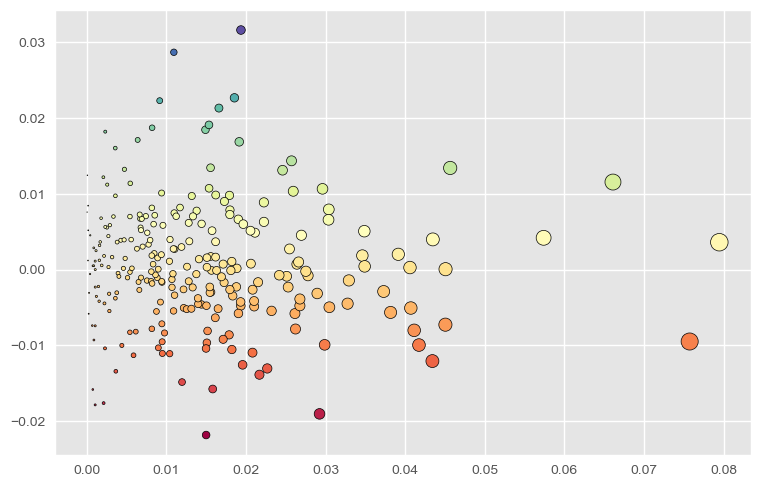

In [99]:
size = np.abs(returns.AMZN) * 2000
plt.scatter(np.abs(returns.AMZN), returns.GLD, c=returns.GLD, 
            cmap='Spectral', s=size, edgecolor='k')

# Histograms & Bar Graphs

In [105]:
x = np.random.standard_normal(10000)
y = np.random.normal(1,1,10000)

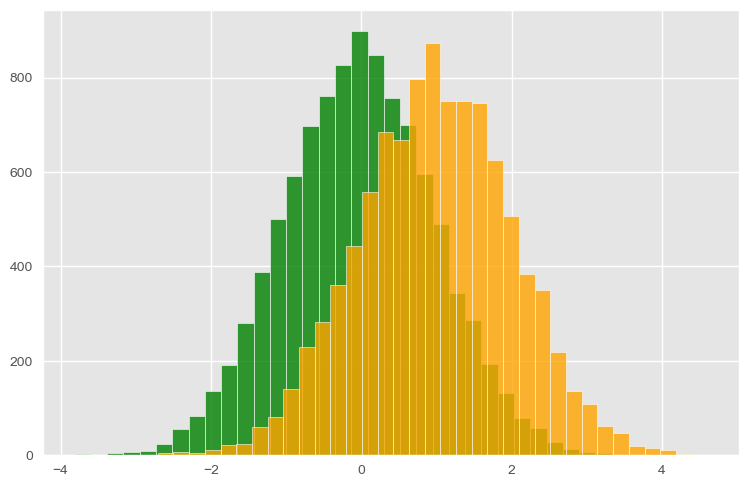

In [109]:
plt.hist(x, bins=35, color='g', edgecolor='w', alpha=.8)
plt.hist(y, bins=35, color='orange', edgecolor='w', alpha=.8);

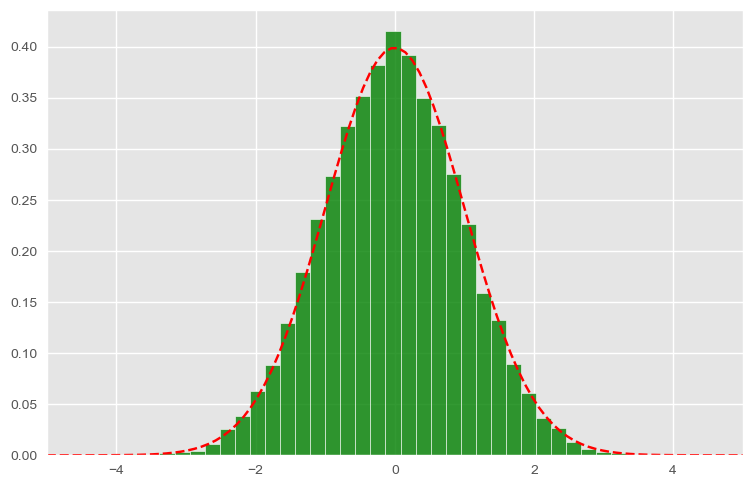

In [115]:
plt.xlim(-5,5)
plt.hist(x, bins=35, density=True, color='g', edgecolor='w', alpha=.8)
overlay = np.linspace(-5,5, 100)
mean, std = 0, 1
pdf = norm.pdf(overlay, mean, std)

plt.plot(overlay, pdf, 'r--');

In [116]:
groups = {"under 5": 6.8, "5 to 17": 18.9, "18 to 24": 9.6,
          "25 to 44": 30.2, "45 to 64": 22.1, "over 65": 12.4}

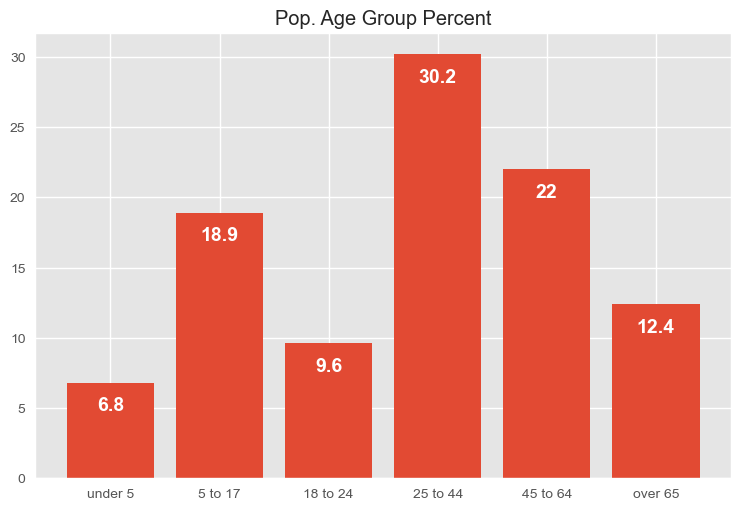

In [123]:
plt.title("Pop. Age Group Percent")
plt.bar(groups.keys(), groups.values())
for k,v in groups.items():
    plt.text(k, v-2, str(v), fontsize=14,fontweight='bold', color='w',
            horizontalalignment='center')
